EDA Udemy

In [1]:
# Librerías a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_udemy_courses = pd.read_csv('udemy_courses.csv', sep=',')

In [3]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.3+ KB


Análisis de la columna price

In [4]:
# Rango de precios en USD
vmin = df_udemy_courses['price'].min()
vmax = df_udemy_courses['price'].max()
rango_precios = []
rango_precios.append(vmin)
rango_precios.append(vmax)
print(f'Analizando la columna de precios obtenemos el rango {rango_precios} en unidades de USD')

Analizando la columna de precios obtenemos el rango [0, 200] en unidades de USD


In [5]:
# Precio promedio
avg_precio = df_udemy_courses['price'].mean()
avg_precio= "{:.2f}".format(avg_precio)
print(f'Y vemos que el valor promedio es de {avg_precio}')

Y vemos que el valor promedio es de 66.10


In [6]:
mode_precio = df_udemy_courses['price'].mode()
mode_precio = mode_precio[0]
print(f'Pero el precio que más veces se a comprado ronda alrededor de {mode_precio} USD')

Pero el precio que más veces se a comprado ronda alrededor de 20 USD


Análisis de la columna num_subscribers

In [7]:
num_min = df_udemy_courses['num_subscribers'].min()
num_max = df_udemy_courses['num_subscribers'].max()
rango_subscriptores = []
rango_subscriptores.append(num_min)
rango_subscriptores.append(num_max)
print(f'Analizando la columna de subscriptores obtenemos el rango {rango_subscriptores}')

Analizando la columna de subscriptores obtenemos el rango [0, 268923]


In [8]:
avg_subscriptores = df_udemy_courses['num_subscribers'].mean()
avg_subscriptores= "{:.2f}".format(avg_subscriptores)
print(f'Y vemos que el promedio es de {avg_subscriptores}')

Y vemos que el promedio es de 3190.59


Graficamos la relación entre la cantidad de subscriptores por curso y su precio

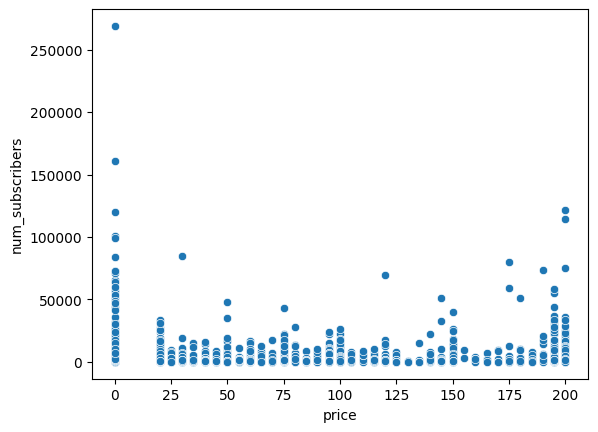

In [9]:
ax = sns.scatterplot(x = 'price', y = 'num_subscribers', data= df_udemy_courses)

Notamos que muy probablemente tenemos outliers en la información, por lo que procederemos a identificarlos y posteriormente mostrar el comportamiento sin outliers

Identificación de Outliers en 'num_subscribers'

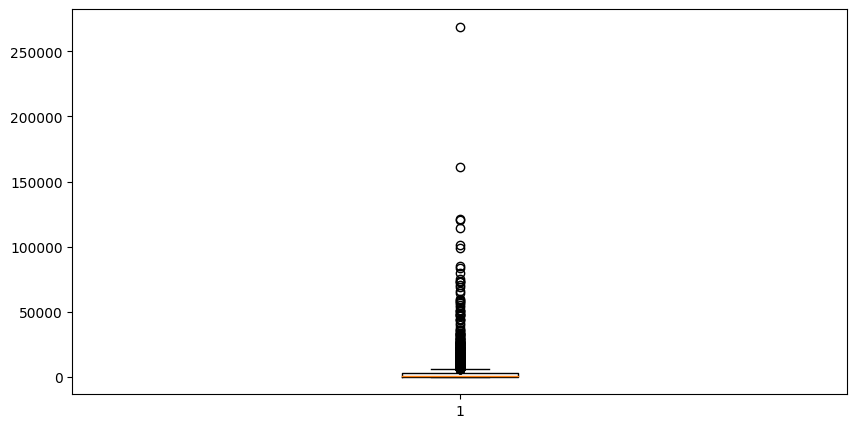

In [10]:
fig = plt.figure(figsize =(10, 5))
# Creating plot
plt.boxplot(df_udemy_courses['num_subscribers'])
# show plot
plt.show()

In [11]:
# Se acomodan las cantidades para un cálculo correcto
sorted_data = np.sort(df_udemy_courses['num_subscribers'])
# Se calculan el primer quartile (Q1) y el tercer quartile (Q3)
Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)
# Calculo del rango interquartile  (IQR)
IQR = Q3 - Q1
# Calculo de los limites inferiores y superiores para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the outliers
outliers = df_udemy_courses['num_subscribers'][(df_udemy_courses['num_subscribers'] < lower_bound) | (df_udemy_courses['num_subscribers'] > upper_bound)]
# Valores outliers
print(f'Cantidad de outliers: {outliers.count()}')
print(f'Lista: {outliers}')
print(f'min outlier: {outliers.min()}')

Cantidad de outliers: 432
Lista: 5        9221
19       8095
22      10149
32       8797
35       7884
        ...  
3627     8415
3632    10110
3637     6315
3659    73110
3662     7318
Name: num_subscribers, Length: 432, dtype: int64
min outlier: 6215


Identificación de outliers en 'price'

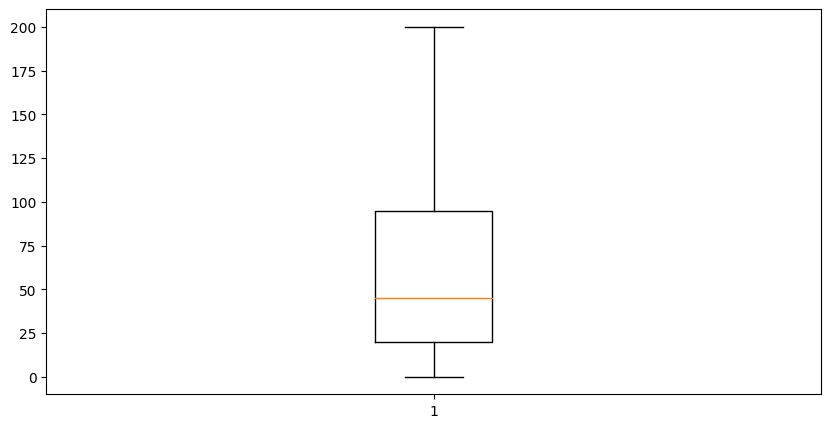

In [12]:
fig = plt.figure(figsize =(10, 5))
# Creating plot
plt.boxplot(df_udemy_courses['price'])
# show plot
plt.show()

La columna de precio no tiene outliers

Gráfica para mostrar el comportamiento de los precios según la cantidad de cursos

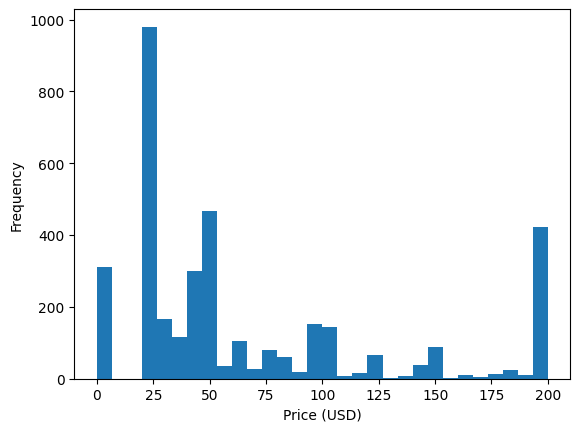

In [13]:
# Histograma
num_bins = 30
fig, ax = plt.subplots()
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Frequency')
n = ax.hist(df_udemy_courses['price'], bins=num_bins)

Nótese que la mayoría de los cursos tienen un precio alrededor de los $25 USD. Dicho esto, también cabe denotar que hay una grán cantidad de cursos en los valores de precio alrededor de $50 y $200, seguidos por los cursos con precios alrededor de $100.

Cantidad de cursos en orden mayor a menor: $25, $50, $200, $100, $150, $125

Gráfica para mostrar el comportamiento de los subscriptores según sus agrupaciones (cantidades) y frecuencias:

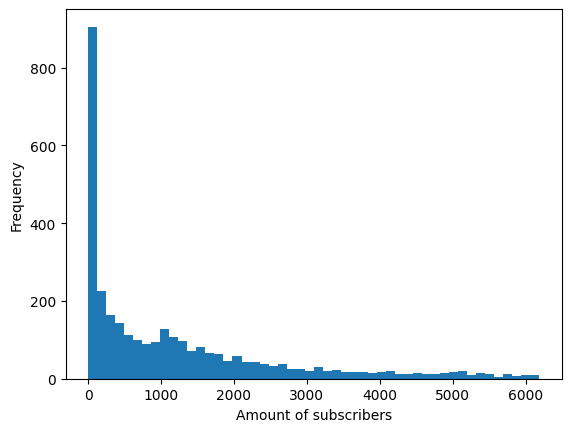

In [14]:
# df sin outliers para 'price'
df_udemy_price = df_udemy_courses[(df_udemy_courses['num_subscribers'] < 6215) & (df_udemy_courses['num_subscribers'] > 0)]
# Histograma
num_bins = 50
fig, ax = plt.subplots()
ax.set_xlabel('Amount of subscribers')
ax.set_ylabel('Frequency')
n = ax.hist(df_udemy_price['num_subscribers'], bins=num_bins)

Nótense 2 cosas:

1.- los subscriptores tienden a agruparse mayormente en conjuntos alrededor de 1,000 personas, y conforme los grupos incrementan los cursos más populares tienen menos presencia en la gráfica.

2.- Existen gran cantidad de cursos que cuentan con una cantidad de subscriptores cercana a 0, pero en esta gráfica excluímos los cursos con 0 (cero) subscriptores.

Gráfica para mostrar la correlación entre los comportamientos de los subscriptores y precios SIN outliers:

[Text(0.5, 0, 'Price (usd)'),
 Text(0, 0.5, 'Subscribers'),
 Text(0.5, 1.0, 'Price vs. Subscribers'),
 (0.0, 205.0)]

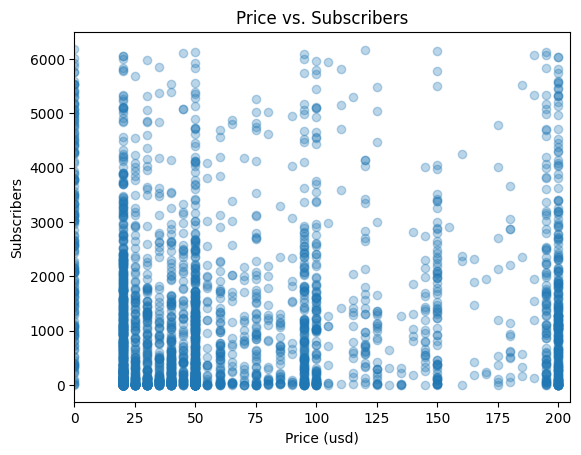

In [15]:
df_udemy_sin_outliers = df_udemy_courses[df_udemy_courses['num_subscribers'] < 6215]
fig = plt.figure()
ax = plt.axes()
# Graficamos putnos semi transparentes, cada uno con el label adecuado
ax.scatter(x = 'price', y= 'num_subscribers', data= df_udemy_sin_outliers ,alpha = 0.3)

ax.set(xlabel='Price (usd)', ylabel='Subscribers',
       title='Price vs. Subscribers', xlim = (0,205))

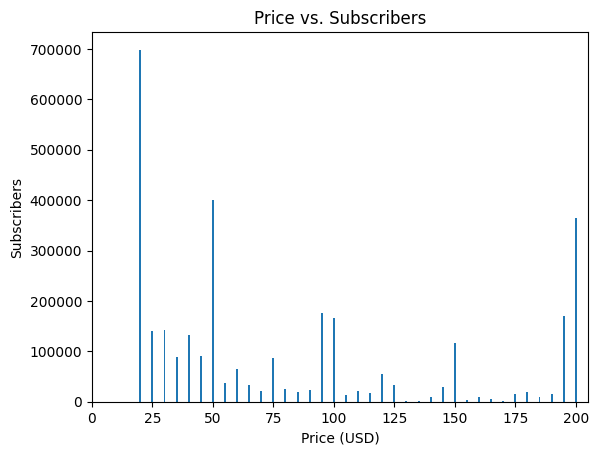

In [16]:
df_udemy_sin_outliers = df_udemy_courses[df_udemy_courses['num_subscribers'] < 6215]

# Calculate the average number of subscribers for each price category
df_grouped = df_udemy_sin_outliers.groupby('price')['num_subscribers'].sum().reset_index()

# Plotting the bar diagram
fig, ax = plt.subplots()
ax.bar(df_grouped['price'], df_grouped['num_subscribers'], alpha= 1)

ax.set(xlabel='Price (USD)', ylabel='Subscribers',
       title='Price vs. Subscribers', xlim=(0, 205))

plt.show()

Analizando las 2 gráficas anteriores podemos notar que en efecto hay gran predominancia en los cursos de bajo precio, aunque en este caso también hay un comportamiento donde los cursos de $200 tienen bastantes subscriptores.

Análisis según el nivel ('Level')

In [17]:
df_grouped_level = df_udemy_courses.groupby('level')['num_subscribers']
df_grouped_level = df_grouped_level.count()
df_grouped_level = pd.DataFrame(df_grouped_level)
df_grouped_level = df_grouped_level.sort_values('num_subscribers', ascending=False)
df_grouped_level

,num_subscribers
level,
All Levels,1925
Beginner Level,1268
Intermediate Level,421
Expert Level,58


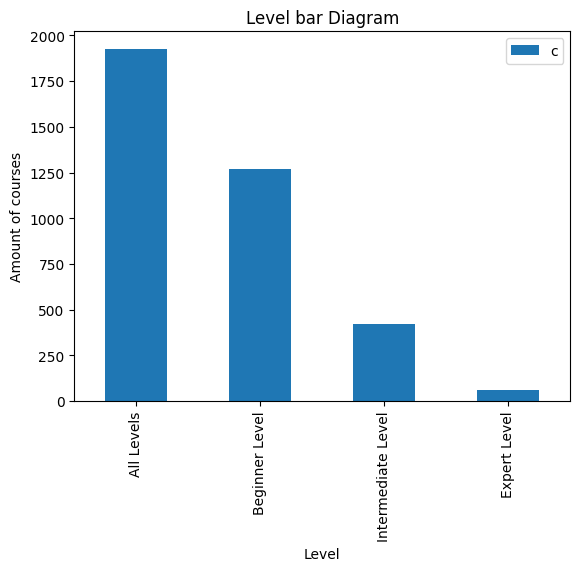

In [18]:
ax = df_grouped_level.plot(kind='bar')
# Customize the plot
ax.set_xlabel('Level')
ax.set_ylabel('Amount of courses')
ax.set_title('Level bar Diagram')
ax.legend('concentration')
plt.show()

Según la información se puede inferir que los niveles más atractivos o más buscados son los cursos todo en uno (All Levels), seguido de los introductorios (Beginner).

Análisis de ramas de estudio ('subject')

Ramas de estudio con mayor cantidad de cursos:

In [19]:
grouped_subject = df_udemy_courses.groupby('subject')
grouped_subject = grouped_subject['course_id'].count()
grouped_subject = pd.DataFrame(grouped_subject)
grouped_subject = grouped_subject.sort_values('course_id', ascending=False)
grouped_subject.head(7)

,course_id
subject,
Web Development,1199
Business Finance,1191
Musical Instruments,680
Graphic Design,602


Ramas de estudio con mayor cantidad de subscriptores:

In [20]:
grouped_subject_subs = df_udemy_courses.groupby('subject')
grouped_subject_subs = grouped_subject_subs['num_subscribers'].sum()
grouped_subject_subs = pd.DataFrame(grouped_subject_subs)
grouped_subject_subs = grouped_subject_subs.sort_values('num_subscribers', ascending=False)
grouped_subject_subs.head(7)

,num_subscribers
subject,
Web Development,7937287
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


In [22]:
grouped_subject_price = df_udemy_courses.groupby('subject')
grouped_subject_price = grouped_subject_price['price'].sum()
grouped_subject_price = pd.DataFrame(grouped_subject_price)
grouped_subject_price = grouped_subject_price.sort_values('price', ascending=False)
grouped_subject_price.head(7)

,price
subject,
Web Development,92365
Business Finance,81815
Graphic Design,34850
Musical Instruments,33700


In [24]:
merged_df = pd.merge(grouped_subject, grouped_subject_subs, on='subject').merge(grouped_subject_price, on='subject')
merged_df

,course_id,num_subscribers,price
subject,,,
Web Development,1199,7937287,92365
Business Finance,1191,1868711,81815
Musical Instruments,680,846689,33700
Graphic Design,602,1063148,34850


Analizando las ramas de estudio podemos observar que las dos más buscadas son 1.Web Development y 2.Business Finance sin importar si cambiamos el filtro de precio, subscriptores o cantidad de cursos.

Análisis de evolución según el tiempo

In [48]:
min_date = df_udemy_courses['published_timestamp'].min()
max_date = df_udemy_courses['published_timestamp'].max()
time_range = []
time_range.append(min_date)
time_range.append(max_date)
print(f'Undemy rango de publicaciones: {time_range}')

Undemy rango de publicaciones: ['2011-07-09T05:43:31Z', '2017-07-06T21:46:30Z']


In [72]:
df_udemy_time = df_udemy_courses[(df_udemy_courses['is_paid'] == False) & (df_udemy_courses['published_timestamp'] >= '2012-01-01')].count()
Not_paid = df_udemy_time['is_paid']
print(f'Udemy cuenta con {Not_paid} cursos gratuitos')


Udemy cuenta con 310 cursos gratuitos


In [75]:
df_paid = df_udemy_courses[['is_paid','published_timestamp']]
df_paid['published_timestamp']

,is_paid,published_timestamp
0,True,2017-01-18T20:58:58Z


Gráfica de aumento de todos los cursos sobre el tiempo:

In [103]:
# Modificar formato para su utilización
df_paid['published_timestamp'] = pd.to_datetime(df_paid['published_timestamp'], format='%Y-%m-%d', errors='coerce')

In [95]:
# Modificar formato para su utilización
df_paid['is_paid'] = df_paid['is_paid'].astype(str)

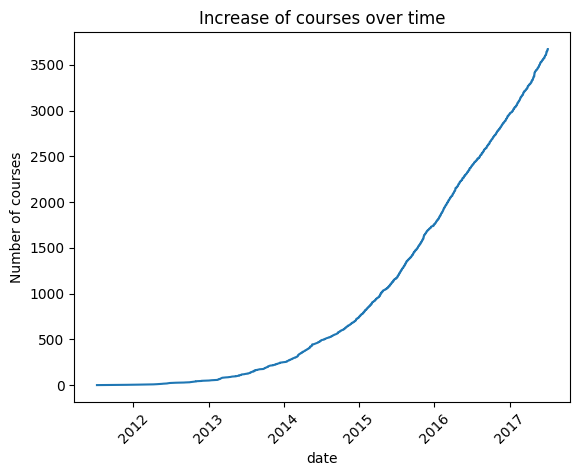

In [104]:
df_paid = df_paid.sort_values('published_timestamp')

df_paid['count'] = range(1, len(df_paid) + 1)

plt.plot(df_paid['published_timestamp'], df_paid['count'])
plt.xlabel('date')
plt.ylabel('Number of courses')
plt.title('Increase of courses over time')
plt.xticks(rotation=45)
plt.show()

Gráfica de aumento de cursos GRATUITOS sobre el tiempo:

In [107]:
df_paid_free = df_paid[df_paid['is_paid'] == 'False']
df_paid_free.head(1)

,is_paid,published_timestamp,count
1282,False,2012-05-09,13


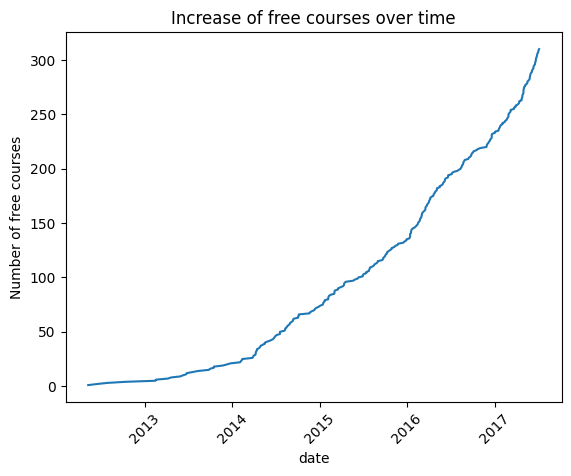

In [110]:

df_paid_free = df_paid_free.sort_values('published_timestamp')

df_paid_free['count'] = range(1, len(df_paid_free) + 1)

plt.plot(df_paid_free['published_timestamp'], df_paid_free['count'])
plt.xlabel('date')
plt.ylabel('Number of free courses')
plt.title('Increase of free courses over time')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Regresar el formato a str para mejor visualización de tablas
df_paid['published_timestamp'] = df_paid['published_timestamp'].dt.strftime('%Y-%m-%d')

Observando los gráfico de tiempo podemos notar que la tendencia es completamente creciente para la cantidad de cursos nuevos al año, cursos tanto pagados y gratuitos. Se podría decir el crecimiento ah sido exponencial.

No va a ser posible analizar el comportamiento de los precios a lo largo del tiempo debido a que los precios en la base de datos son actuales, no necesariamente corresponden con su precio al momento de ser publicado.

In [3]:
df_udemy_courses.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
df_udemy_courses.shape

(3672, 12)